# Prepare the dataset to sociodemographic

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr, pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.preprocessing import StandardScaler

import util

## Loading data

In [4]:
df_base_original = pd.read_csv('data/output/df_dataset.csv', index_col=0)

In [5]:
df_base_original.columns

Index(['code_municipality_7', 'municipality', 'region', 'population',
       'latitude', 'longitude', 'code_municipality_6',
       'percentage_population_age_range_0_19',
       'percentage_population_age_range_20_39',
       'percentage_population_age_range_40_59',
       'percentage_population_age_range_60_more',
       'percentage_urban_population', 'average_residents_per_households',
       'percentage_population_in_households_more_2_residents_per_bedroom',
       'percentage_male_population', 'percentage_indigenous_population',
       'percentage_black_and_brown_population', 'life_expectancy_at_birth',
       'density_median_effectively_domiciled_area', 'per_capita_income',
       'gini', 'per_capita_cash_transfer_program',
       'percentage_estimated_households_in_informal_settlements',
       'percentage_population_in_informal_settlements',
       'demographic_density_in_informal_settlements',
       'percentage_population_in_households_without_bathroom',
       'percentage_ho

In [6]:
df_political = pd.read_csv('data/output/df_dataset_political.csv', index_col=0)

## Treating missing data
Missing data for five municipalities founded after 2010. We removed these municipalities from the dataset and also the municipalities that ones was part.

Municípios de origem:

    Mojuí dos Campos (PA): Emancipado em 2013 do município de Moju (https://en.wikipedia.org/wiki/Moju%C3%AD_dos_Campos).
    Pescaria Brava (SC): Desmembrado de Imbituba em 2013 (https://en.wikipedia.org/wiki/Pescaria_Brava).
    Balneário Rincão (SC): Separado de Içara também em 2013 (https://pt.wikipedia.org/wiki/Balne%C3%A1rio_Rinc%C3%A3o).
    Pinto Bandeira (RS): Originário do município de Carlos Barbosa, emancipado em 2013 (https://en.wikipedia.org/wiki/Pinto_Bandeira).
    Paraíso das Águas (MS): Desmembrado de Mundo Novo em 2013 (https://pt.wikipedia.org/wiki/Para%C3%ADso_das_%C3%81guas).

In [7]:
municipalities_to_remove = df_base_original[df_base_original.isna().any(axis=1)]['municipality'].values
municipalities_to_remove = np.append(municipalities_to_remove, ['Moju (PA)', 'Imbituba (SC)', 'Içara (SC)', 'Carlos Barbosa (RS)', 'Mundo Novo (MS)'])

In [8]:
df_base_original[df_base_original.municipality.isin(municipalities_to_remove)]

,code_municipality_7,municipality,region,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
223,1504703,Moju (PA),Norte,83039,-1.885889,-48.767199,150470,38.288033,34.189959,20.638495,...,37.75,5.74,72.39,3.08,53.16,12.34,19.55,8.05,12.47,7.26
224,1504752,Mojuí dos Campos (PA),Norte,23501,NaN,NaN,150475,34.232586,30.275307,23.394749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.82,NaN
4419,4207007,Içara (SC),Sul,59035,-28.707084,-49.300823,420700,26.113323,32.291014,27.107648,...,22.27,4.22,30.21,0.10,10.96,17.74,29.62,25.48,2.61,10.11
4422,4207304,Imbituba (SC),Sul,52581,-28.239951,-48.669284,420730,23.993458,29.366121,27.740058,...,24.57,5.51,36.82,0.10,7.75,17.75,46.15,8.16,3.23,10.80
4503,4212650,Pescaria Brava (SC),Sul,10190,NaN,NaN,421265,23.954858,28.930324,28.459274,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.33,NaN
4605,4220000,Balneário Rincão (SC),Sul,15981,NaN,NaN,422000,26.055941,26.450160,25.786872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.44,NaN
4696,4304804,Carlos Barbosa (RS),Sul,30418,-29.298297,-51.503818,430480,21.819318,31.162470,28.351634,...,22.22,2.50,27.58,0.00,14.15,10.45,27.95,36.02,1.89,10.97
4923,4314548,Pinto Bandeira (RS),Sul,2723,NaN,NaN,431454,19.500551,25.119354,26.257804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.37,NaN
5154,5005681,Mundo Novo (MS),Centro-Oeste,19193,-23.935274,-54.281661,500568,28.400980,28.812588,26.290835,...,22.19,9.51,52.80,0.31,15.51,16.10,41.64,13.83,8.77,9.42
5160,5006275,Paraíso das Águas (MS),Centro-Oeste,5510,NaN,NaN,500627,30.998185,30.471869,26.061706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.19,NaN


In [9]:
population_to_remove = df_base_original[df_base_original.municipality.isin(municipalities_to_remove)]['population'].sum()
population_to_remove

302171

In [10]:
population_to_remove / df_base_original['population'].sum() * 100

0.1488068856352964

In [11]:
df_base_original = df_base_original.loc[df_base_original['municipality'].isin(municipalities_to_remove) == False]

In [12]:
df_base_original

,code_municipality_7,municipality,region,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
0,1100015,Alta Floresta D'Oeste (RO),Norte,21495,-11.935540,-61.999824,110001,29.276576,29.309142,26.871365,...,34.73,6.07,58.32,1.15,38.56,13.78,33.18,3.26,8.41,8.67
1,1100023,Ariquemes (RO),Norte,96833,-9.908463,-63.033269,110002,29.736763,33.135398,25.601809,...,27.66,5.11,47.19,0.16,14.97,17.99,40.06,9.10,5.92,9.18
2,1100031,Cabixi (RO),Norte,5363,-13.499763,-60.544314,110003,27.428678,24.855491,28.305053,...,32.98,2.90,60.62,0.65,45.49,6.46,36.91,3.98,10.18,10.09
3,1100049,Cacoal (RO),Norte,86895,-11.433865,-61.442944,110004,27.389378,33.099718,26.171817,...,24.97,6.28,44.93,0.43,19.69,19.00,39.07,10.43,6.29,9.74
4,1100056,Cerejeiras (RO),Norte,15890,-13.195033,-60.818426,110005,28.445563,30.780365,26.085588,...,28.46,5.72,54.46,0.38,26.67,14.08,38.39,6.87,7.85,10.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis (GO),Centro-Oeste,14956,-16.742081,-48.513471,522200,27.360257,29.459749,28.450120,...,26.44,4.03,50.59,1.23,24.67,13.05,38.80,13.71,6.55,10.11
5566,5222054,Vicentinópolis (GO),Centro-Oeste,8768,-17.732662,-49.807239,522205,28.592609,32.744069,26.881843,...,17.41,6.23,41.65,1.55,32.41,10.67,34.51,16.29,9.13,10.07
5567,5222203,Vila Boa (GO),Centro-Oeste,4215,-15.034889,-47.057361,522220,33.618031,29.822064,24.578885,...,13.70,8.93,38.76,1.74,26.76,7.35,31.03,14.85,12.83,10.49
5568,5222302,Vila Propício (GO),Centro-Oeste,5815,-15.454635,-48.882422,522230,28.323302,26.672399,29.062769,...,23.59,4.46,62.74,0.20,47.74,5.17,28.96,6.97,14.32,9.46


In [13]:
df_political = df_political.loc[df_political['municipality'].isin(municipalities_to_remove) == False]

## Transformed datasets

In [14]:
df_features_only = df_base_original.drop(columns=df_base_original.columns[:7])

#### Standardized dataset

In [15]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(df_features_only)
df_standardized = pd.DataFrame(features_standardized, columns=df_features_only.columns, index=df_features_only.index)

#### Transforming features

In [16]:
df_transformed_features = df_features_only.copy()

In [17]:
df_transformed_features['log_density_median_effectively_domiciled_area'] = np.log(df_transformed_features['density_median_effectively_domiciled_area'])
df_transformed_features['sqrt_percentage_indigenous_population'] = np.sqrt(df_transformed_features['percentage_indigenous_population'])
df_transformed_features['log_per_capita_income'] = np.log(df_transformed_features['per_capita_income'])
df_transformed_features['log_per_capita_cash_transfer_program'] = np.log(df_transformed_features['per_capita_cash_transfer_program'])
df_transformed_features['sqrt_percentage_estimated_households_in_informal_settlements'] = np.sqrt(df_transformed_features['percentage_estimated_households_in_informal_settlements'])
df_transformed_features['sqrt_percentage_population_in_informal_settlements'] = np.sqrt(df_transformed_features['percentage_population_in_informal_settlements'])
df_transformed_features['sqrt_demographic_density_in_informal_settlements'] = np.sqrt(df_transformed_features['demographic_density_in_informal_settlements'])
df_transformed_features['sqrt_percentage_population_in_households_without_bathroom'] = np.sqrt(df_transformed_features['percentage_population_in_households_without_bathroom'])
df_transformed_features['sqrt_percentage_hospitalizations_diseases_inadequate_sanitation'] = np.sqrt(df_transformed_features['percentage_hospitalizations_diseases_inadequate_sanitation'])
df_transformed_features['sqrt_percentage_poor_population_spending_more_1_hour_to_work'] = np.sqrt(df_transformed_features['percentage_poor_population_spending_more_1_hour_to_work'])
df_transformed_features['sqrt_illiteracy_rate'] = np.sqrt(df_transformed_features['illiteracy_rate'])

In [18]:
df_transformed_features = df_transformed_features.drop(columns=['density_median_effectively_domiciled_area','per_capita_income','per_capita_cash_transfer_program', 'percentage_indigenous_population', 'percentage_estimated_households_in_informal_settlements','percentage_population_in_informal_settlements', 'demographic_density_in_informal_settlements', 'percentage_population_in_households_without_bathroom', 'percentage_hospitalizations_diseases_inadequate_sanitation','percentage_poor_population_spending_more_1_hour_to_work','illiteracy_rate'])

### Min-max normalized dataset

In [19]:
scaler = MinMaxScaler()
# Fit and transform the data
df_normalized_min_max = pd.DataFrame(scaler.fit_transform(df_transformed_features), columns=df_transformed_features.columns, index=df_transformed_features.index)

### L2 normalized dataset

In [20]:
df_normalized_l2 = pd.DataFrame(preprocessing.Normalizer().fit_transform(df_transformed_features), columns=df_transformed_features.columns, index=df_transformed_features.index)

### L1 normalized dataset

In [21]:
df_normalized_l1 = pd.DataFrame(preprocessing.Normalizer(norm='l1').fit_transform(df_transformed_features), columns=df_transformed_features.columns, index=df_transformed_features.index)

### Max normalized dataset

In [22]:
df_normalized_max = pd.DataFrame(preprocessing.Normalizer(norm='max').fit_transform(df_transformed_features), columns=df_transformed_features.columns, index=df_transformed_features.index)

## Treating collinearity

### Util

In [23]:
def plot_spearman(df):
    palette = util.get_default_colors_heatmap()
    attributes = df.columns[:]
    n = len(attributes)
    yticks = [f"{i + 1} - {attr}" for i, attr in enumerate(attributes)]
    xticks = list(range(1, n + 1))
    df_selected_attributes = df[attributes]
    correlation, pvalue = spearmanr(df_selected_attributes)
    pvalue = np.round(pvalue, 2)
    
    mask = np.zeros_like(correlation)
    mask[np.triu_indices_from(mask, k=1)] = True
    
    largura = 70
    altura = 50
    
    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    
    f, ax = plt.subplots(figsize=(util.centimeter_to_inch(largura), util.centimeter_to_inch(altura)))
    ax = sns.heatmap(correlation, vmin=-1, vmax=1, center=0, square=False, mask=mask, cmap=palette,
                     yticklabels=yticks, xticklabels=xticks, annot=correlation,
                     cbar_kws={"orientation": "horizontal"}, cbar=True)
    plt.xticks(rotation=0)
    plt.show()

In [24]:
def plot_pearson(df):
    palette = util.get_default_colors_heatmap()
    # Assuming df_without_collinearity_standardized is your DataFrame
    attributes = df.columns[:]
    n = len(attributes)
    yticks = [f"{i + 1} - {attr}" for i, attr in enumerate(attributes)]
    xticks = list(range(1, n + 1))
    
    # Select the desired attributes
    df_selected_attributes = df[attributes]
    
    # Calculate the Pearson correlation matrix
    correlation = df_selected_attributes.corr()
    
    # Initialize a matrix for p-values
    pvalue = np.zeros((n, n))
    
    # Compute p-values
    for i in range(n):
        for j in range(n):
            if i != j:
                _, pvalue[i, j] = pearsonr(df_selected_attributes.iloc[:, i], df_selected_attributes.iloc[:, j])
            else:
                pvalue[i, j] = np.nan  # NaN for diagonal
    
    # Round p-values to two decimal places
    pvalue = np.round(pvalue, 2)
    
    # Create a mask to hide the upper triangle
    mask = np.zeros_like(correlation, dtype=bool)
    mask[np.triu_indices_from(mask, k=1)] = True
    
    # Set plot dimensions
    largura = 70
    altura = 50
    
    # Convert dimensions from centimeters to inches
    def centimeter_to_inch(cm):
        return cm / 2.54
    
    # Set seaborn style
    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    
    # Plot the correlation heatmap with annotations for correlation values
    f, ax = plt.subplots(figsize=(centimeter_to_inch(largura), centimeter_to_inch(altura)))
    ax = sns.heatmap(correlation, vmin=-1, vmax=1, center=0, square=False, mask=mask, cmap=palette,
                     yticklabels=yticks, xticklabels=xticks, annot=correlation, fmt=".2f",
                     cbar_kws={"orientation": "horizontal"}, cbar=True)
    plt.xticks(rotation=0)
    plt.show()  

In [25]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

### Original scale

In [26]:
df_without_collinearity_original = df_features_only.copy()

#### First roud analysis

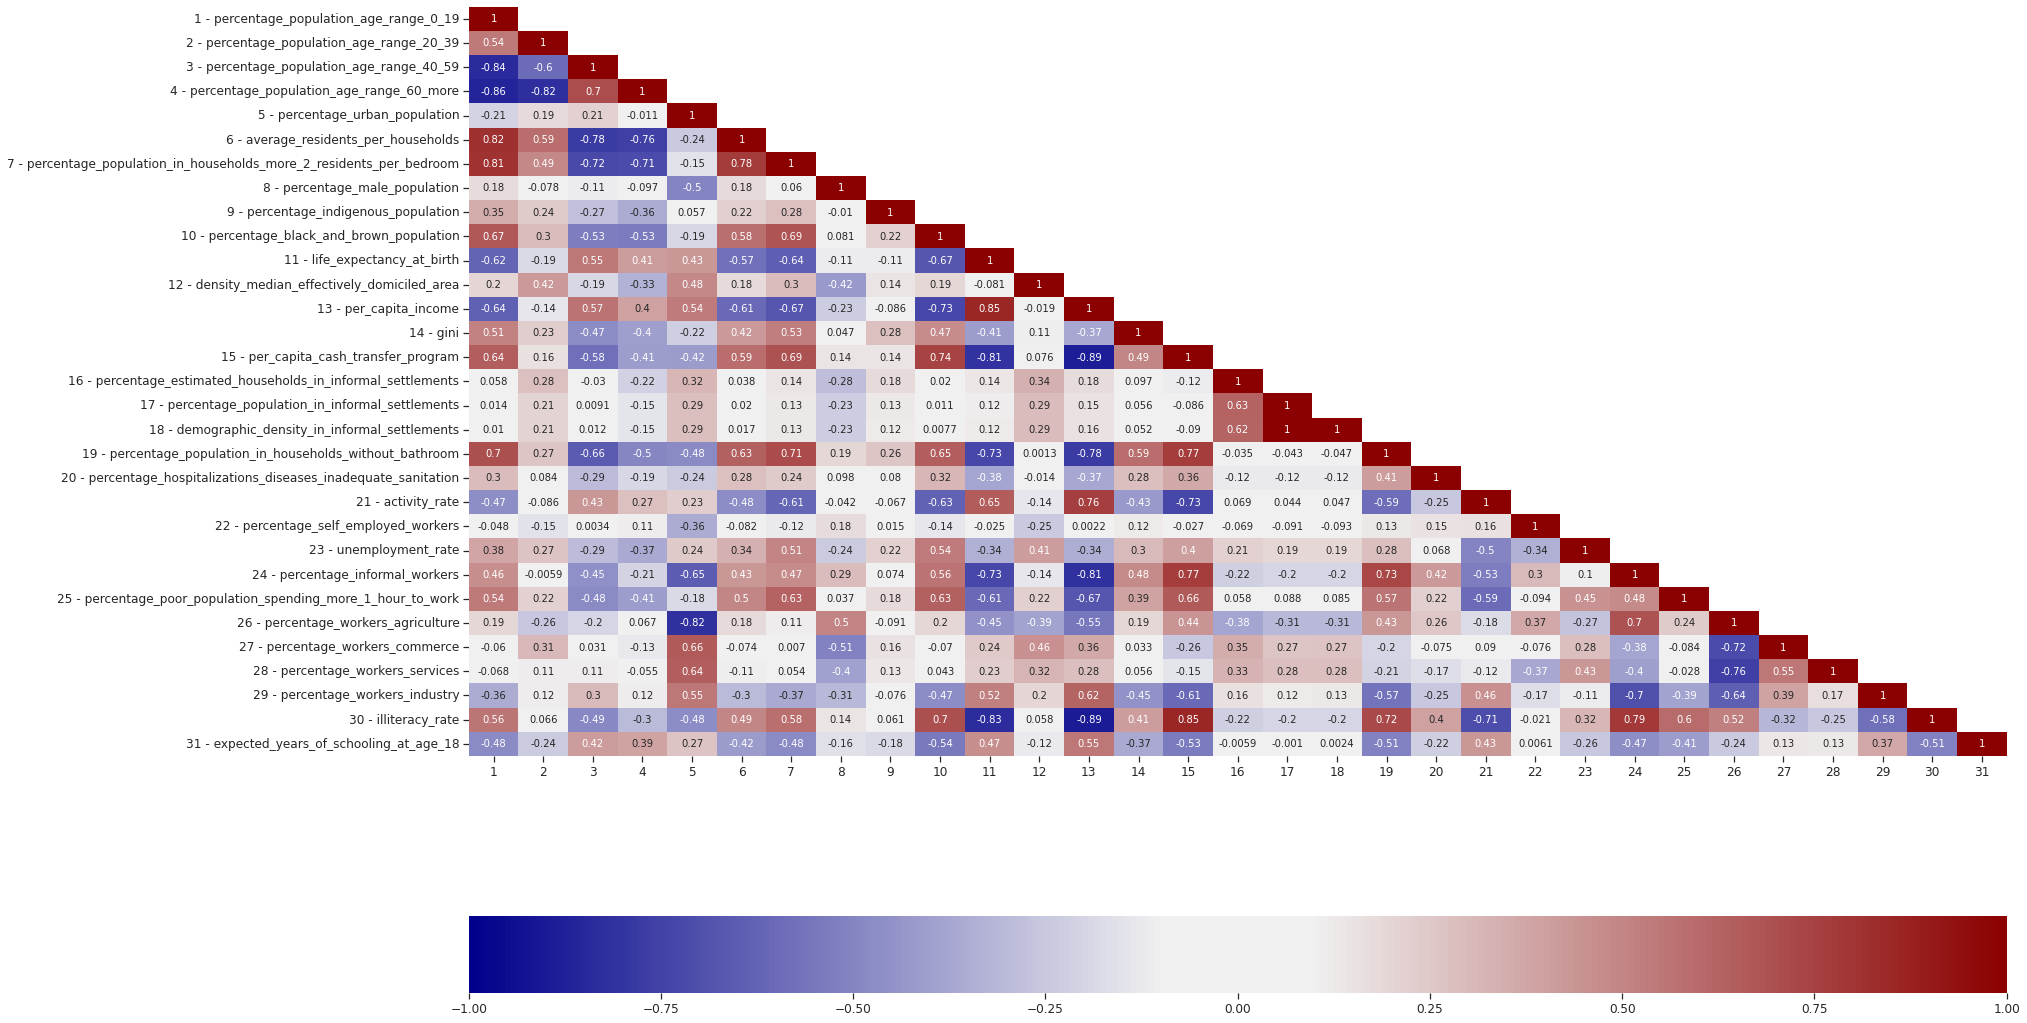

In [27]:
plot_spearman(df_without_collinearity_original)

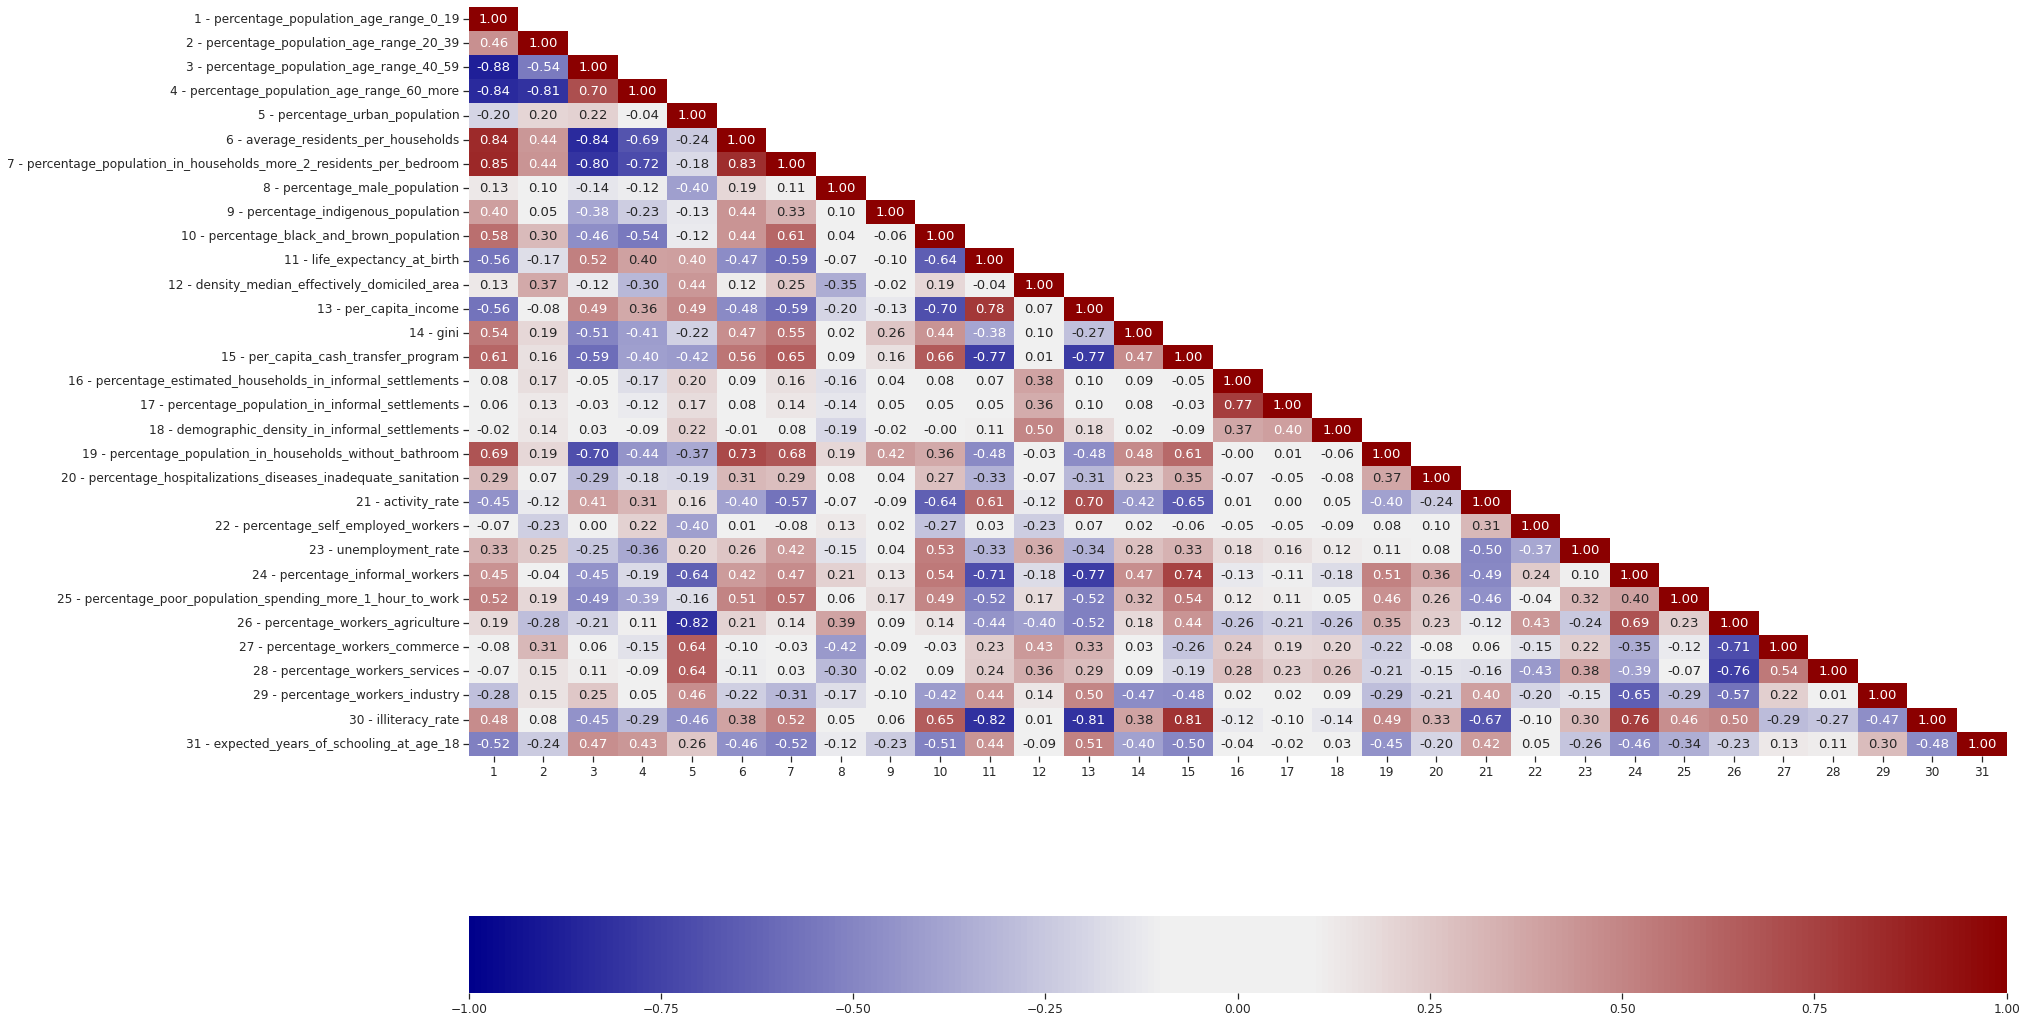

In [28]:
plot_pearson(df_without_collinearity_original)

In [29]:
calculate_vif(df_without_collinearity_original)

,Feature,VIF
0,percentage_population_age_range_0_19,589.680398
1,percentage_population_age_range_20_39,684.684120
2,percentage_population_age_range_40_59,644.716226
3,percentage_population_age_range_60_more,235.002902
4,percentage_urban_population,37.463378
5,average_residents_per_households,446.193714
6,percentage_population_in_households_more_2_res...,30.520347
7,percentage_male_population,1725.091278
8,percentage_indigenous_population,1.765574
9,percentage_black_and_brown_population,30.803074


In [30]:
collinear_attribute_to_remove = ['life_expectancy_at_birth','percentage_male_population','percentage_population_age_range_20_39','percentage_population_age_range_40_59','percentage_population_age_range_0_19','average_residents_per_households','percentage_population_age_range_60_more','gini','activity_rate','percentage_workers_services','expected_years_of_schooling_at_age_18']

#### Second round analysis

In [31]:
df_without_collinearity_original = df_without_collinearity_original.drop(columns=collinear_attribute_to_remove)

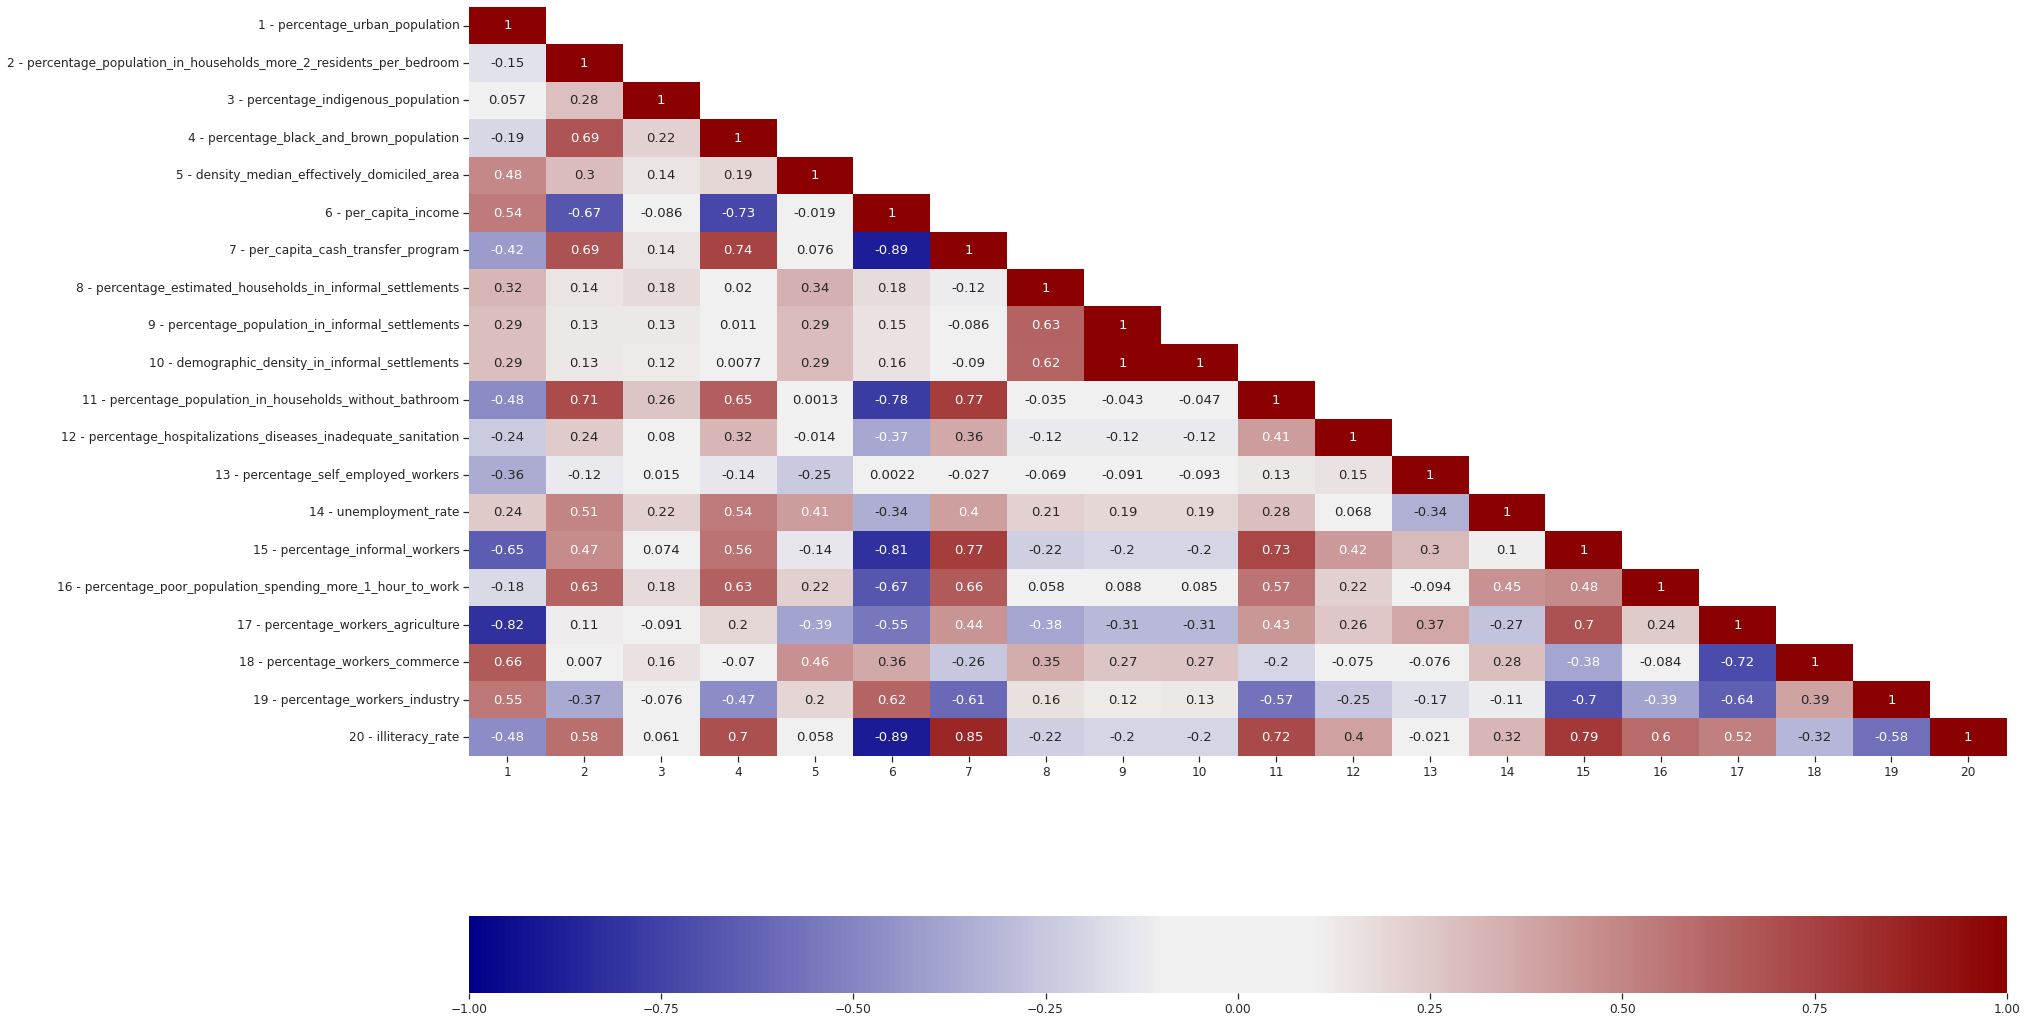

In [32]:
plot_spearman(df_without_collinearity_original)

In [33]:
calculate_vif(df_without_collinearity_original)

,Feature,VIF
0,percentage_urban_population,27.632419
1,percentage_population_in_households_more_2_res...,16.337382
2,percentage_indigenous_population,1.508122
3,percentage_black_and_brown_population,23.536323
4,density_median_effectively_domiciled_area,6.136092
5,per_capita_income,16.256037
6,per_capita_cash_transfer_program,11.494246
7,percentage_estimated_households_in_informal_se...,2.751748
8,percentage_population_in_informal_settlements,2.601504
9,demographic_density_in_informal_settlements,1.560408


#### Third round analysis

In [34]:
df_without_collinearity_original = df_without_collinearity_original.drop(columns=['percentage_informal_workers','percentage_black_and_brown_population','percentage_workers_agriculture'])

In [35]:
calculate_vif(df_without_collinearity_original)

,Feature,VIF
0,percentage_urban_population,25.258227
1,percentage_population_in_households_more_2_res...,14.331488
2,percentage_indigenous_population,1.356506
3,density_median_effectively_domiciled_area,5.996286
4,per_capita_income,14.141872
5,per_capita_cash_transfer_program,10.750027
6,percentage_estimated_households_in_informal_se...,2.732724
7,percentage_population_in_informal_settlements,2.600587
8,demographic_density_in_informal_settlements,1.546697
9,percentage_population_in_households_without_ba...,3.277251


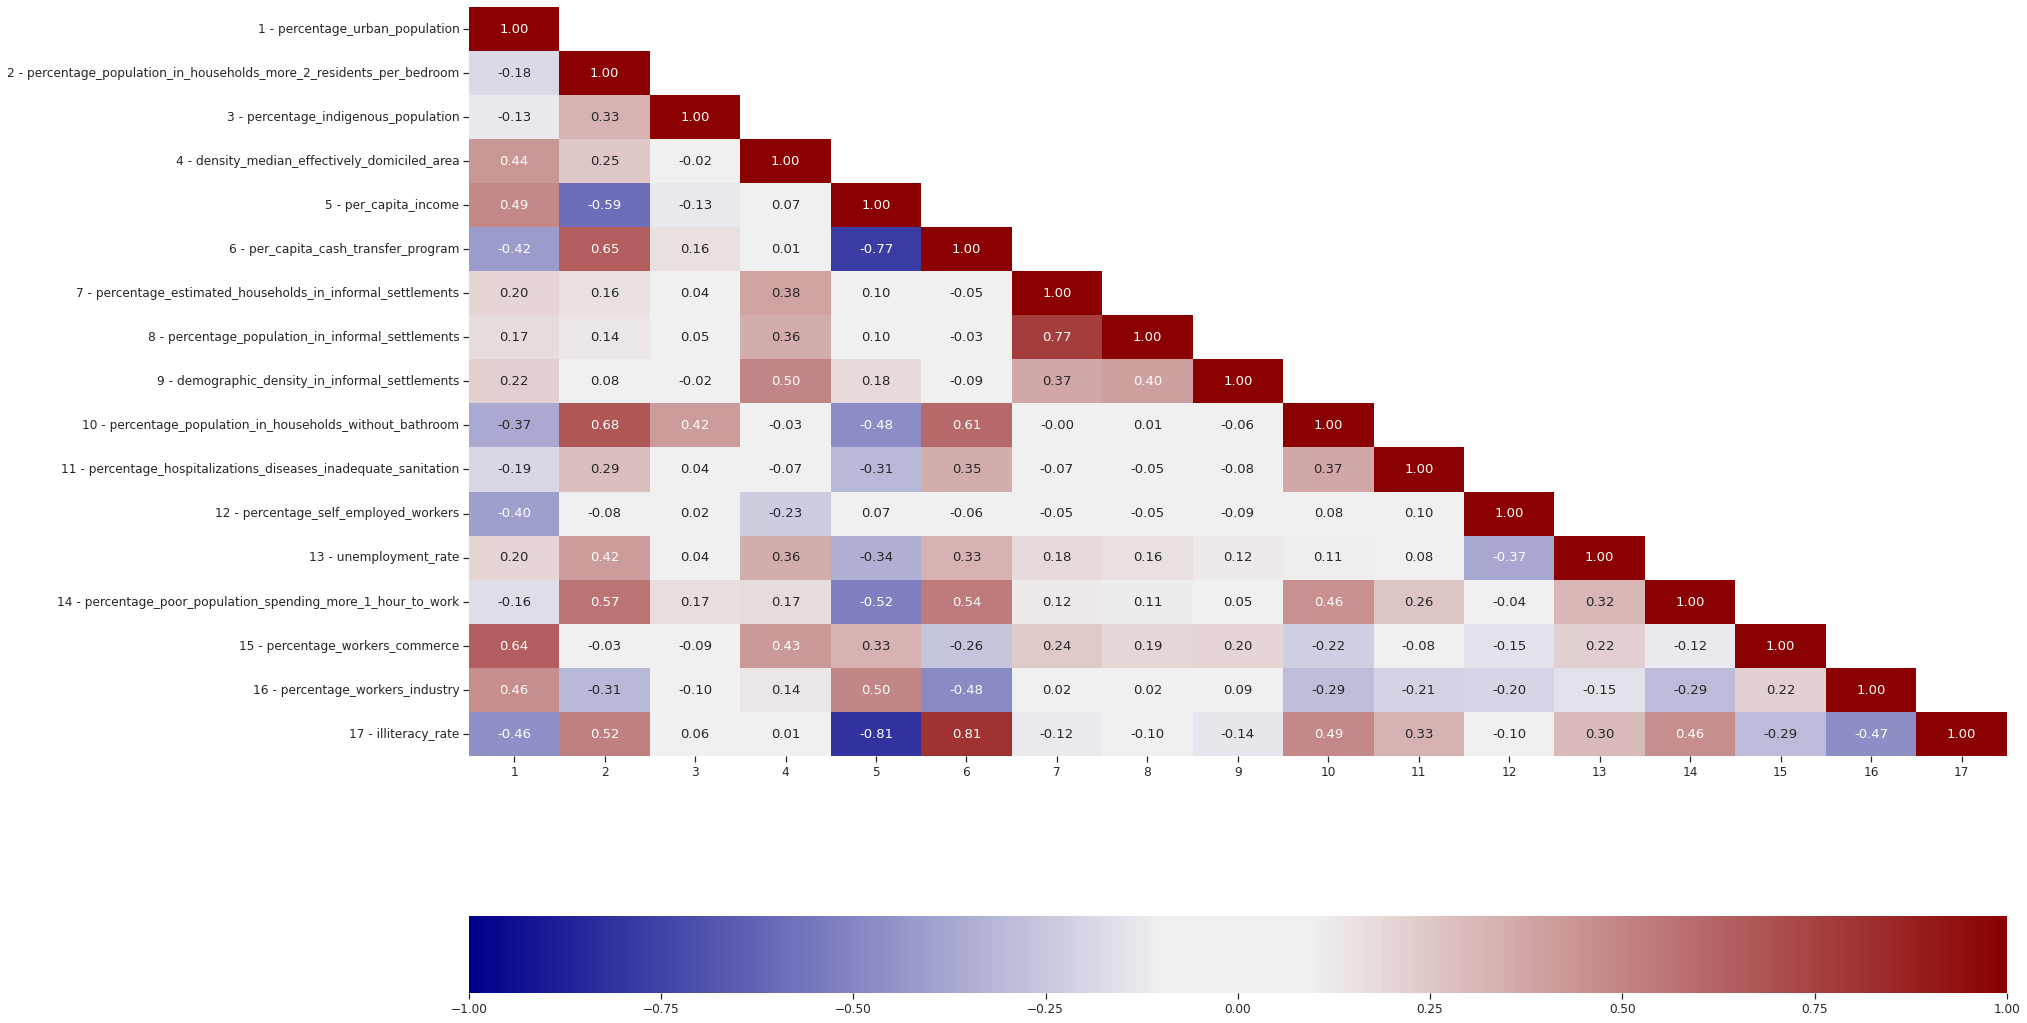

In [36]:
plot_pearson(df_without_collinearity_original)

### Standardized data
Standardizing data is necessary to treat the collinearity. Without standardizing data the collinearity is significant. We tried with orginal, transformed, and normalized data.

In [37]:
df_without_collinearity_standardized = df_standardized.copy()

#### First round analysis

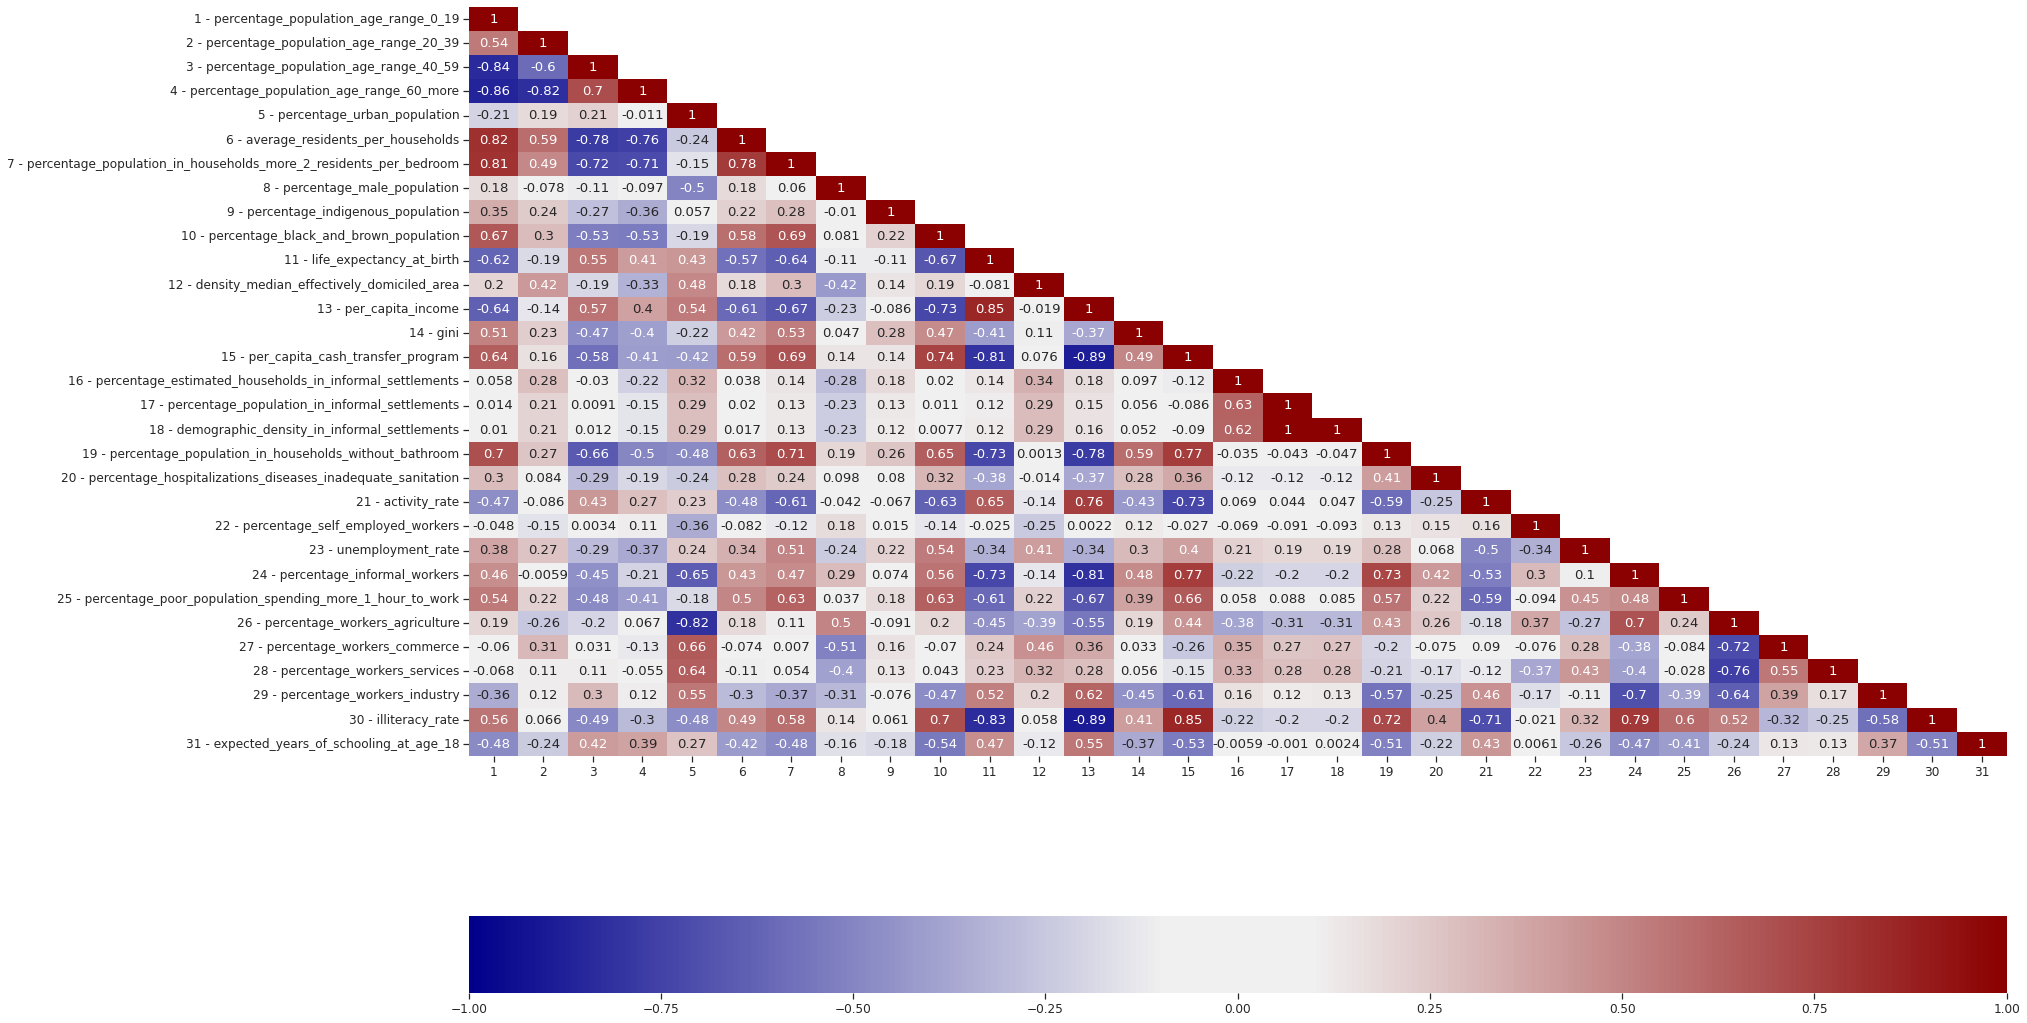

In [38]:
plot_spearman(df_without_collinearity_standardized)

In [39]:
calculate_vif(df_without_collinearity_standardized)

,Feature,VIF
0,percentage_population_age_range_0_19,124.405793
1,percentage_population_age_range_20_39,44.572365
2,percentage_population_age_range_40_59,39.079803
3,percentage_population_age_range_60_more,110.069299
4,percentage_urban_population,3.999599
5,average_residents_per_households,5.691738
6,percentage_population_in_households_more_2_res...,6.437001
7,percentage_male_population,1.759724
8,percentage_indigenous_population,1.706674
9,percentage_black_and_brown_population,4.332015


In [40]:
collinear_attribute_to_remove = ['percentage_population_age_range_0_19', 'percentage_population_age_range_20_39', 'percentage_population_age_range_40_59', 'percentage_workers_agriculture', 'average_residents_per_households', 'percentage_population_in_households_more_2_residents_per_bedroom', 'per_capita_cash_transfer_program', 'percentage_population_in_households_without_bathroom', 'activity_rate', 'percentage_informal_workers', 'illiteracy_rate', 'percentage_black_and_brown_population', 'life_expectancy_at_birth', 'percentage_poor_population_spending_more_1_hour_to_work','percentage_population_in_informal_settlements','per_capita_income']

#### Second round analysis

In [41]:
df_without_collinearity_standardized = df_without_collinearity_standardized.drop(columns=collinear_attribute_to_remove)

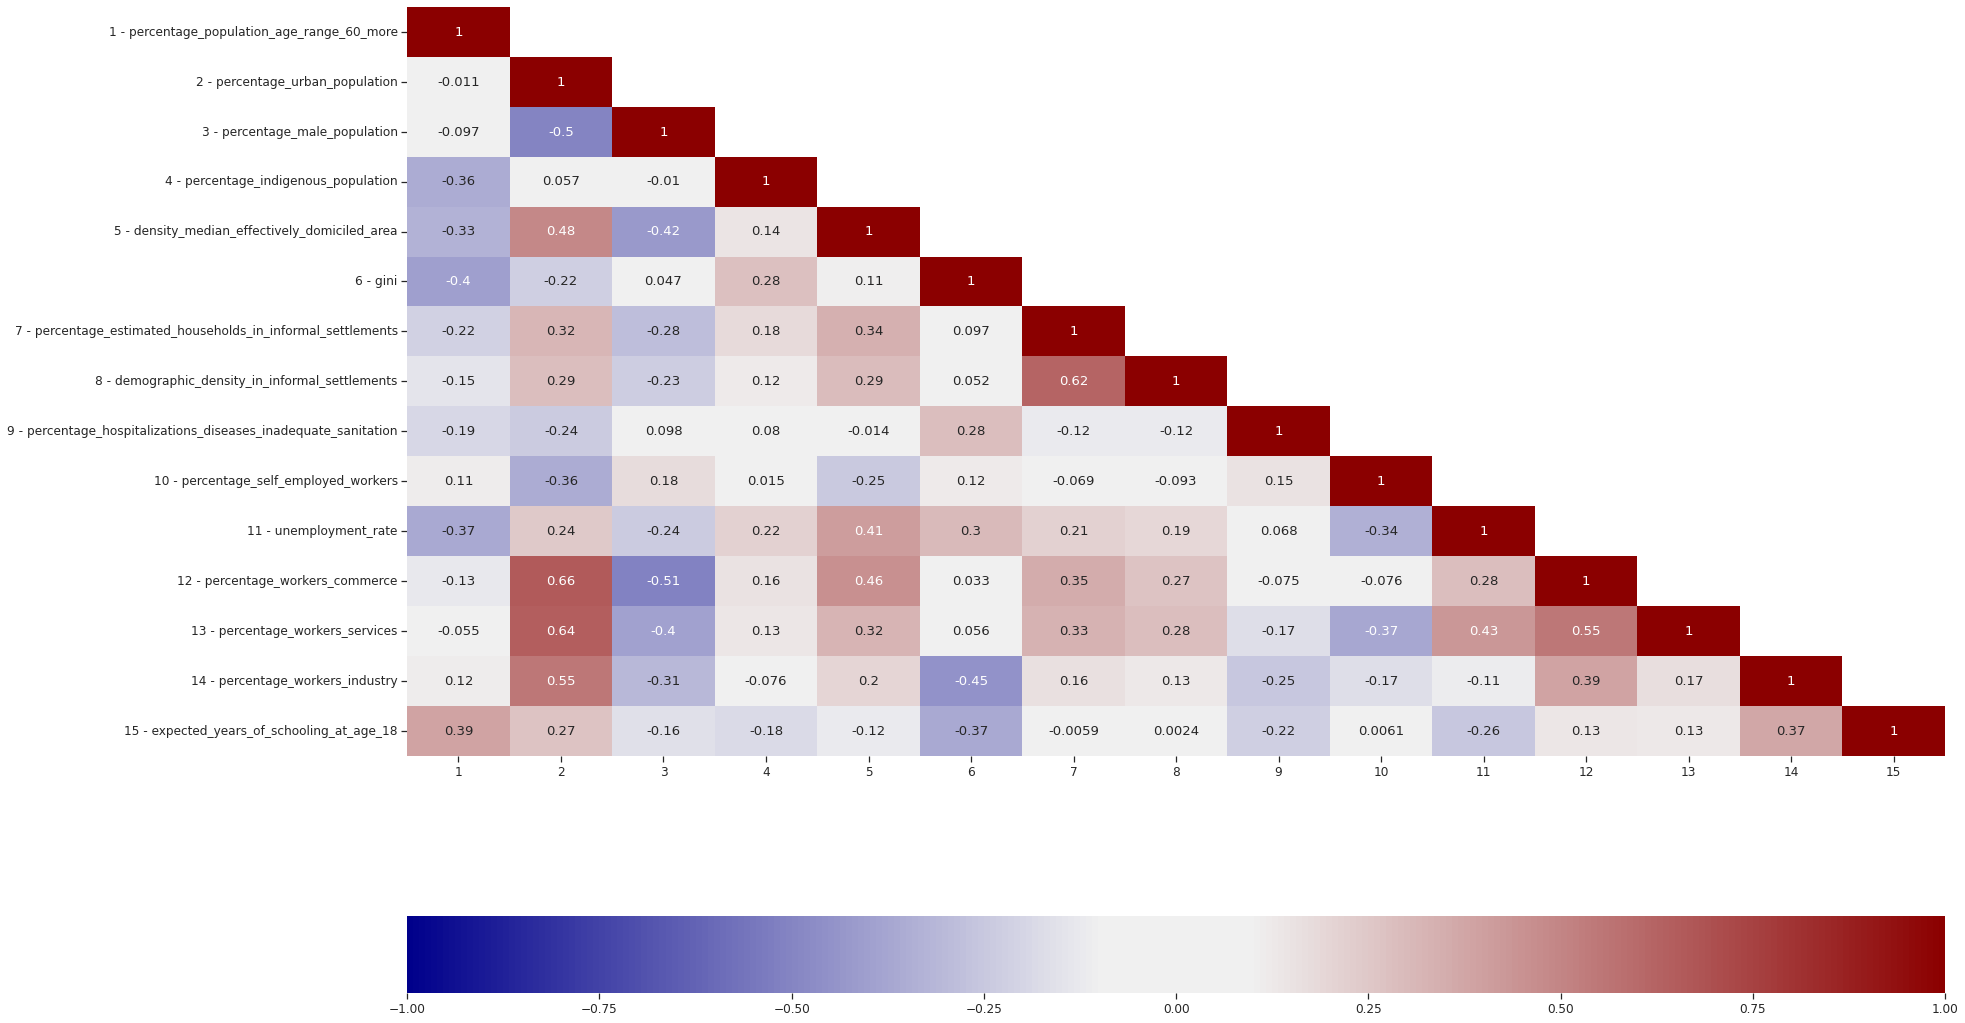

In [42]:
plot_spearman(df_without_collinearity_standardized)

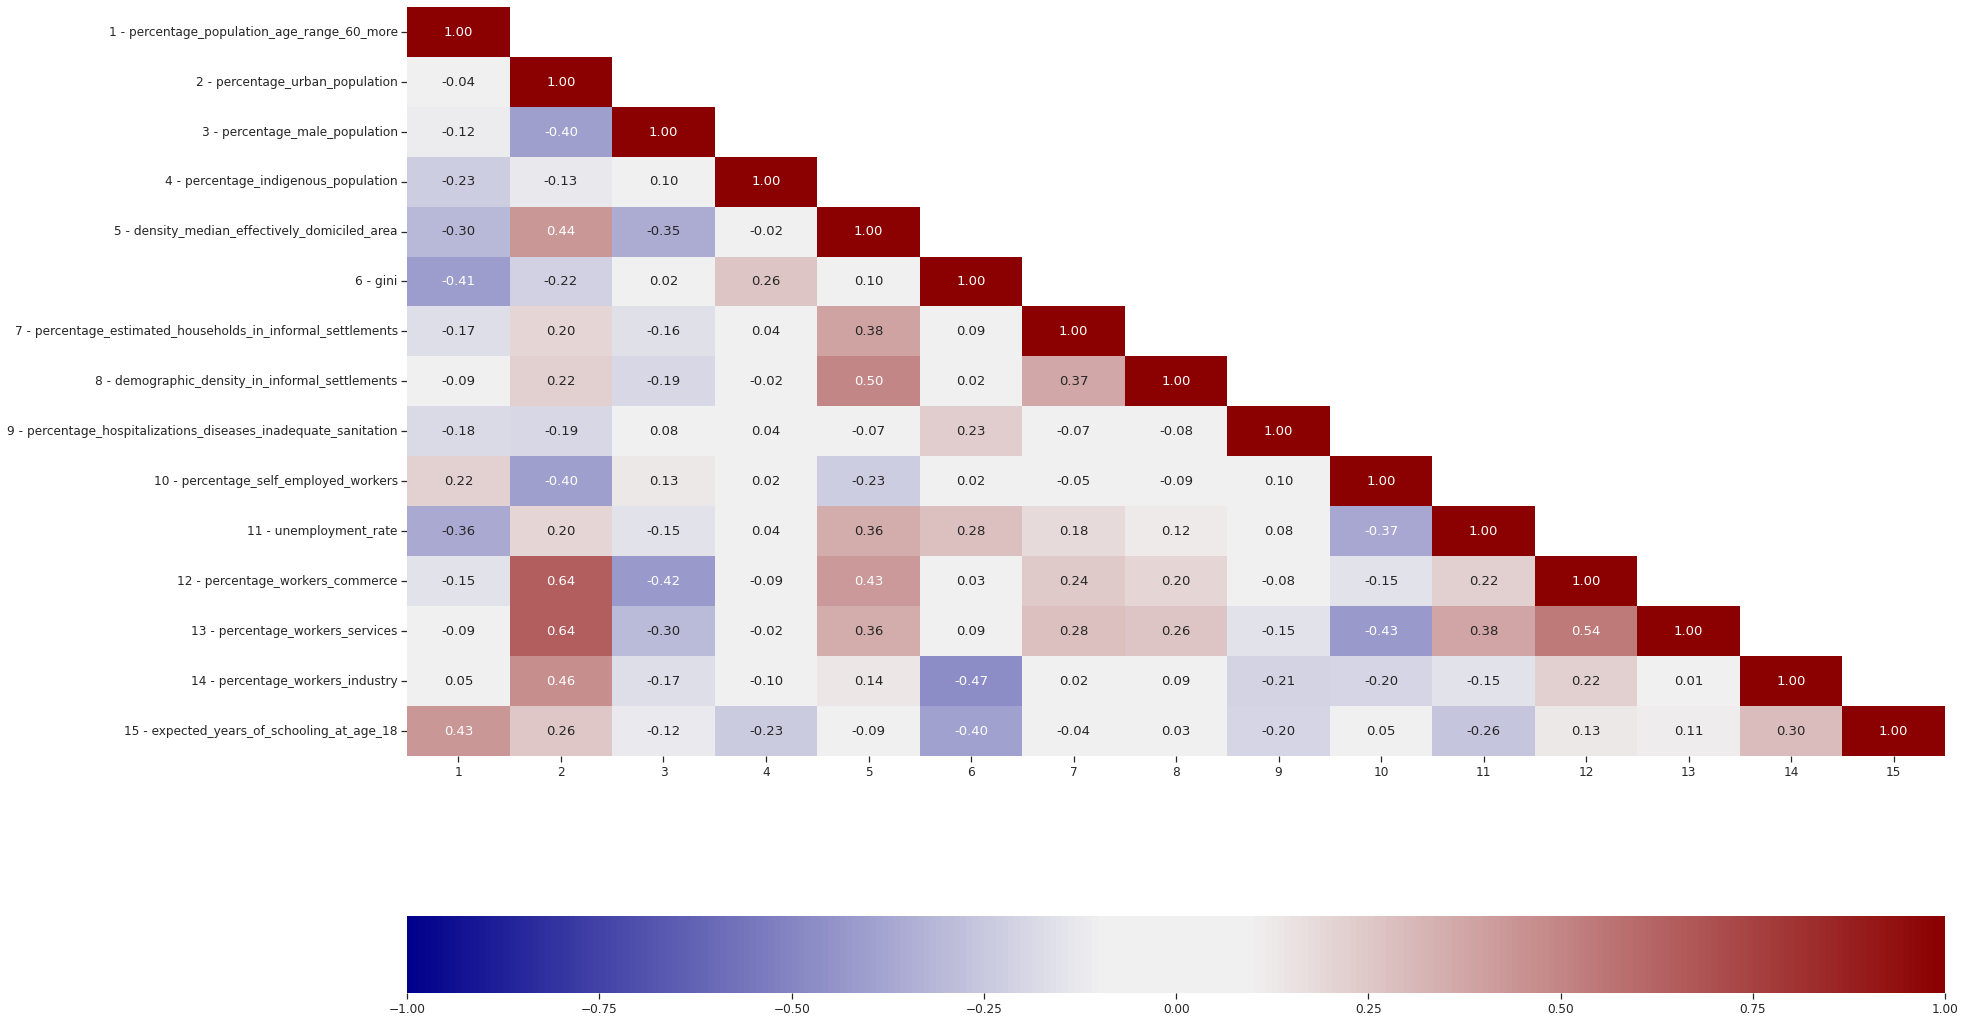

In [43]:
plot_pearson(df_without_collinearity_standardized)

In [44]:
calculate_vif(df_without_collinearity_standardized)

,Feature,VIF
0,percentage_population_age_range_60_more,1.801026
1,percentage_urban_population,3.511831
2,percentage_male_population,1.420793
3,percentage_indigenous_population,1.145027
4,density_median_effectively_domiciled_area,2.019994
5,gini,1.768674
6,percentage_estimated_households_in_informal_se...,1.297214
7,demographic_density_in_informal_settlements,1.453382
8,percentage_hospitalizations_diseases_inadequat...,1.141347
9,percentage_self_employed_workers,1.571579


In [45]:
columns_without_collinearity = df_without_collinearity_standardized.columns
columns_without_collinearity

Index(['percentage_population_age_range_60_more',
       'percentage_urban_population', 'percentage_male_population',
       'percentage_indigenous_population',
       'density_median_effectively_domiciled_area', 'gini',
       'percentage_estimated_households_in_informal_settlements',
       'demographic_density_in_informal_settlements',
       'percentage_hospitalizations_diseases_inadequate_sanitation',
       'percentage_self_employed_workers', 'unemployment_rate',
       'percentage_workers_commerce', 'percentage_workers_services',
       'percentage_workers_industry', 'expected_years_of_schooling_at_age_18'],
      dtype='object')

## Dimensionality reduction

In [46]:
list_datasets = [df_standardized, df_normalized_min_max, df_normalized_l2, df_normalized_l1, df_normalized_max]
list_datasets_names = ['df_standardized', 'df_normalized_min_max', 'df_normalized_l2', 'df_normalized_l1', 'df_normalized_max']

### For all features

In [47]:
for dataset, dataset_name in zip(list_datasets, list_datasets_names):
    print('\n'+dataset_name)
    for components in [2, 6]:
        print('component: ' + str(components))
        pca = PCA(n_components=components, whiten=False)
        pca_transformed = pca.fit_transform(dataset)
        print(sum(pca.explained_variance_ratio_))
        columns = ['principal_component_1', 'principal_component_2']
        if components > 2:
            for i in range(components - 2):
                columns.append('principal_component_{}'.format(2+i+1))
        df_pca = pd.DataFrame(pca_transformed, columns=columns, index=dataset.index)
        df_pca.to_csv('data/' + dataset_name +'_pca_' + str(components) + '.csv', index=True)


df_standardized
component: 2
0.5072537709668914
component: 6
0.7198979613510975

df_normalized_min_max
component: 2
0.6407190140496938
component: 6
0.7950375236759366

df_normalized_l2
component: 2
0.7859346367730835
component: 6
0.9355048393145939

df_normalized_l1
component: 2
0.7922111249766389
component: 6
0.9401314754002352

df_normalized_max
component: 2
0.7398524883156623
component: 6
0.9216462726751413


## Data overview

In [48]:
df_without_collinearity_standardized.describe().round(2)

,percentage_population_age_range_60_more,percentage_urban_population,percentage_male_population,percentage_indigenous_population,density_median_effectively_domiciled_area,gini,percentage_estimated_households_in_informal_settlements,demographic_density_in_informal_settlements,percentage_hospitalizations_diseases_inadequate_sanitation,percentage_self_employed_workers,unemployment_rate,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,expected_years_of_schooling_at_age_18
count,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.89,-2.71,-2.97,-0.20,-1.37,-3.25,-0.23,-0.17,-0.68,-2.37,-1.76,-2.23,-2.70,-1.08,-4.67
25%,-0.67,-0.76,-0.59,-0.19,-0.63,-0.67,-0.23,-0.17,-0.55,-0.67,-0.68,-0.75,-0.71,-0.71,-0.65
50%,-0.04,0.04,-0.07,-0.18,-0.21,-0.07,-0.23,-0.17,-0.36,-0.21,-0.12,-0.12,-0.06,-0.35,0.01
75%,0.62,0.83,0.49,-0.16,0.36,0.69,-0.23,-0.17,0.12,0.41,0.49,0.65,0.62,0.41,0.68
max,4.68,1.64,20.05,15.53,11.05,4.63,16.17,17.08,11.81,5.28,9.20,5.90,5.15,6.23,3.07


In [49]:
df_without_collinearity_standardized

,percentage_population_age_range_60_more,percentage_urban_population,percentage_male_population,percentage_indigenous_population,density_median_effectively_domiciled_area,gini,percentage_estimated_households_in_informal_settlements,demographic_density_in_informal_settlements,percentage_hospitalizations_diseases_inadequate_sanitation,percentage_self_employed_workers,unemployment_rate,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,expected_years_of_schooling_at_age_18
0,-0.628581,-0.296800,0.284206,0.371415,-0.596432,1.296166,-0.231671,-0.174949,0.318363,1.019514,-0.176079,0.728350,0.081283,-0.711839,-0.722666
1,-1.284191,0.947781,-0.280237,-0.179301,0.263102,0.539257,-0.163265,-0.174949,-0.200168,0.301861,-0.427022,1.683908,0.855398,-0.056770,-0.258143
2,0.383218,-0.960097,0.334943,-0.165356,-0.643147,0.236493,-0.231671,-0.174949,0.927261,0.841877,-1.004713,-0.933097,0.500970,-0.631077,0.570712
3,-0.891584,0.680480,-0.660760,0.120440,-0.090811,1.144784,0.191127,-0.174949,-0.238896,0.028808,-0.121185,1.913151,0.744006,0.092415,0.251921
4,-0.595886,0.946765,-0.318289,-0.172215,-0.452527,0.085111,-0.231671,-0.174949,0.709951,0.383066,-0.267568,0.796442,0.667495,-0.306908,0.689119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,-0.586877,0.420578,-0.235842,-0.172920,-0.212128,-0.520416,-0.231671,-0.174949,1.103690,0.178023,-0.709332,0.562659,0.713627,0.460330,0.588928
5566,-1.228593,0.995862,0.816939,-0.149365,-0.009378,-0.520416,-0.231671,-0.174949,-0.230290,-0.738583,-0.134255,0.022462,0.230930,0.749727,0.552495
5567,-1.185163,0.460540,1.298935,-0.164881,-0.185596,-0.217652,-0.231671,-0.174949,0.167753,-1.115173,0.571522,-0.731090,-0.160628,0.588203,0.935043
5568,-0.323161,-1.569425,1.463828,-0.181779,-0.603939,-0.369034,0.273356,-0.174949,-0.438993,-0.111271,-0.596931,-1.225893,-0.393538,-0.295691,-0.003111


In [50]:
df_base_original.drop(columns=['code_municipality_7']).describe()

,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,average_residents_per_households,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
count,5.560000e+03,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,...,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000
mean,3.646769e+04,-16.440718,-46.223182,325251.580576,27.551123,28.763744,26.277372,17.426309,63.812480,2.844906,...,24.686198,6.743603,56.505743,1.389835,35.568621,10.571038,32.457595,9.606112,11.810653,9.463415
std,2.066998e+05,8.277502,6.410673,98413.674998,4.848060,2.957805,2.657009,4.594961,22.035669,0.321114,...,9.852446,3.825917,19.273486,1.563149,18.250913,4.406196,8.888366,8.915897,7.561540,1.097999
min,8.330000e+02,-33.687567,-72.916501,110001.000000,8.567018,17.264957,10.842848,4.159697,4.178855,2.290000,...,1.360000,0.000000,10.890000,0.000000,0.060000,0.740000,8.500000,0.000000,0.900000,4.340000
25%,5.218000e+03,-22.832696,-50.866922,251209.250000,24.273074,26.957080,24.877145,14.333699,47.072463,2.650000,...,18.080000,4.160000,40.257500,0.330000,21.840000,7.250000,26.127500,3.320000,5.570000,8.750000
50%,1.105950e+04,-18.083051,-46.505069,314605.000000,26.880118,28.870480,26.722121,17.262028,64.641604,2.780000,...,22.665000,6.270000,57.175000,0.900000,36.465000,10.045000,31.890000,6.530000,9.385000,9.470000
75%,2.441375e+04,-8.489476,-41.400709,411881.250000,30.119537,30.566749,28.072239,20.272381,82.157733,2.950000,...,28.692500,8.620000,73.682500,1.910000,49.295000,13.450000,38.002500,13.287500,17.972500,10.210000
max,1.145124e+07,4.585440,-32.435186,530010.000000,60.322886,54.732351,34.872029,38.914729,100.000000,5.860000,...,76.680000,41.930000,97.030000,16.400000,85.120000,36.570000,78.230000,65.110000,36.810000,12.830000


In [51]:
df_base_original[df_base_original['demographic_density_in_informal_settlements'] > 0]['demographic_density_in_informal_settlements'].describe()

count    323.000000
mean      80.101127
std       78.445592
min        0.504977
25%       24.339757
50%       56.869201
75%      104.163750
max      458.863079
Name: demographic_density_in_informal_settlements, dtype: float64

## Saving data

In [52]:
df_base_original.to_csv('data/output/df_base_without_missing_points.csv', index=True)

df_standardized.to_csv('data/output/df_standardized.csv', index=True)
df_transformed_features.to_csv('data/output/df_transformed_features.csv', index=True)
df_normalized_min_max.to_csv('data/output/df_normalized_min_max.csv', index=True)
df_normalized_l2.to_csv('data/output/df_normalized_l2.csv', index=True)
df_normalized_l1.to_csv('data/output/df_normalized_l1.csv', index=True)
df_normalized_max.to_csv('data/output/df_normalized_max.csv', index=True)

df_without_collinearity_standardized.to_csv('data/output/df_without_collinearity_standardized.csv', index=True)

df_political.to_csv('data/output/df_political_without_missing_points.csv', index=True)